In [1]:
%matplotlib inline

In [55]:
from sklearn.linear_model import LogisticRegression as LR

In [6]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
data = load_breast_cancer()

In [8]:
x = data.data
y = data.target

In [9]:
data.data.shape

(569, 30)

In [10]:
lrl1 = LR(penalty="l1", solver="liblinear", C=0.5, max_iter=1000)

In [11]:
lrl2 = LR(penalty="l2", solver="liblinear", C=0.5, max_iter=1000)

In [12]:
# LR 的每个特征对应的参数
lrl1 = lrl1.fit(x, y)

In [13]:
lrl1.coef_

array([[ 3.986506  ,  0.03146149, -0.13503699, -0.0162116 ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50301009,  0.        , -0.07124849,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24528064, -0.12847373, -0.01442108,  0.        ,
         0.        , -2.05512172,  0.        ,  0.        ,  0.        ]])

In [14]:
(lrl1.coef_ != 0).sum(axis=1)

array([10])

In [16]:
lrl2 = lrl2.fit(x, y)

In [17]:
lrl2.coef_

array([[ 1.61520501e+00,  1.03165052e-01,  4.89949805e-02,
        -4.54506240e-03, -9.48008257e-02, -3.01421093e-01,
        -4.56859957e-01, -2.23258616e-01, -1.36553746e-01,
        -1.93906450e-02,  1.51864035e-02,  8.84898752e-01,
         1.16165541e-01, -9.44763174e-02, -9.89655585e-03,
        -2.29726134e-02, -5.65958341e-02, -2.71050955e-02,
        -2.78527986e-02,  3.23035311e-04,  1.25588950e+00,
        -3.02228839e-01, -1.72470649e-01, -2.21057137e-02,
        -1.74443696e-01, -8.78236006e-01, -1.16396034e+00,
        -4.29422377e-01, -4.23200361e-01, -8.69294106e-02]])

In [18]:
(lrl2.coef_ != 0).sum(axis=1)

array([30])

In [20]:
# 比较哪个正则化效果好
l1 = []
l2 = []
l1test = []
l2test = []

XTrain, XTest, YTrain, YTest = train_test_split(x, y, test_size=0.3, random_state=0)

In [21]:
for i in np.linspace(0.05, 1, 19):
    lrl1 = LR(penalty="l1", solver="liblinear", C=i, max_iter=1000)
    lrl2 = LR(penalty="l2", solver="liblinear", C=i, max_iter=1000)
    lrl1 = lrl1.fit(XTrain, YTrain)
    l1.append(accuracy_score(lrl1.predict(XTrain), YTrain))
    l1test.append(accuracy_score(lrl1.predict(XTest), YTest))
    lrl2 = lrl2.fit(XTrain, YTrain)
    l2.append(accuracy_score(lrl2.predict(XTrain), YTrain))
    l2test.append(accuracy_score(lrl2.predict(XTest), YTest))

In [22]:
graph = [l1, l2, l1test, l2test]
color = ["green", "black", "lightgreen", "gray"]
label = ["L1", "L2", "L1Test", "L2Test"]

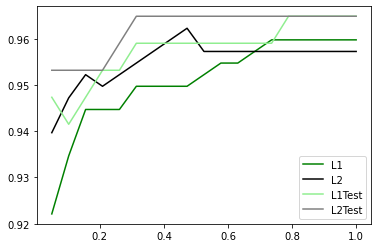

In [23]:
plt.figure()
for i in range(4):
    plt.plot(np.linspace(0.05, 1, 19), graph[i], color=color[i], label=label[i])
plt.legend(loc=4)
plt.show()

In [26]:
# 嵌入法特征选择
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score

In [25]:
data.data.shape

(569, 30)

In [29]:
LR_ = LR(solver="liblinear", C=0.8, random_state=420)
cross_val_score(LR_, data.data, data.target,cv=10).mean()

0.9508145363408522

In [30]:
x_embedded = SelectFromModel(LR_, norm_order=1).fit_transform(data.data, data.target)

In [32]:
x_embedded.shape

(569, 9)

In [33]:
# 减少特征后，准确率下降不多
cross_val_score(LR_, x_embedded, data.target,cv=10).mean()

0.9368107769423559

(0.0, 30)
(0.10332957864533338, 18)
(0.20665915729066675, 12)
(0.3099887359360001, 10)
(0.4133183145813335, 8)
(0.5166478932266669, 8)
(0.6199774718720003, 5)
(0.7233070505173336, 5)
(0.826636629162667, 5)
(0.9299662078080004, 5)
(1.0332957864533339, 5)
(1.136625365098667, 3)
(1.2399549437440005, 3)
(1.343284522389334, 3)
(1.4466141010346671, 2)
(1.5499436796800006, 1)
(1.653273258325334, 1)
(1.7566028369706674, 1)
(1.8599324156160009, 1)
(1.963261994261334, 1)


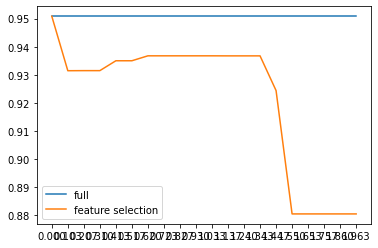

In [37]:
# 调 SelectFromModel 的 threshold
fullx = []
fsx = []

threshold = np.linspace(0, abs((LR_.fit(data.data, data.target).coef_)).max(), 20)

k = 0 
for i in threshold:
    x_embedded = SelectFromModel(LR_, threshold=i).fit_transform(data.data, data.target)
    fullx.append(cross_val_score(LR_, data.data, data.target, cv=5).mean())
    fsx.append(cross_val_score(LR_, x_embedded, data.target, cv=5).mean())
    print((threshold[k], x_embedded.shape[1]))
    k += 1
    
plt.figure()
plt.plot(threshold, fullx, label="full")
plt.plot(threshold, fsx, label="feature selection")
plt.xticks(threshold)
plt.legend()
plt.show()

In [38]:
# LR 的 C 的是学习曲线
fullx = []
fsx = []

C = np.arange(0.01, 10.01, 0.5)

for i in C: 
    LR_ = LR(solver="liblinear", C=i, random_state=420)
    
    fullx.append(cross_val_score(LR_, data.data, data.target, cv=10).mean())
    
    x_embedded = SelectFromModel(LR_, norm_order=1).fit_transform(data.data, data.target)
    fsx.append(cross_val_score(LR_, x_embedded, data.target, cv=10).mean())

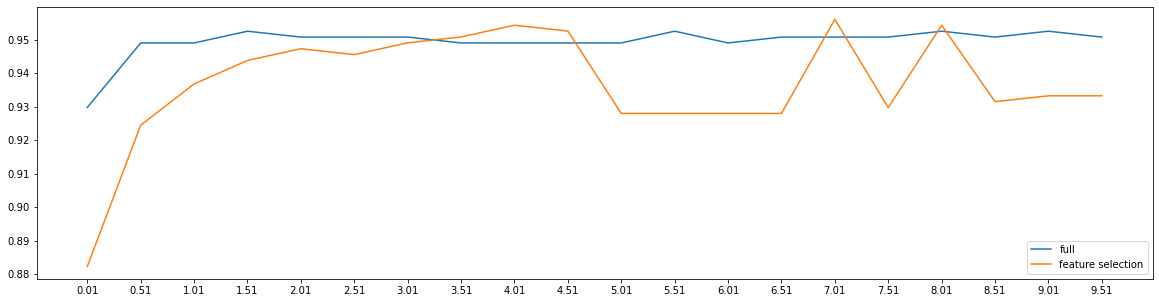

In [40]:
plt.figure(figsize=(20, 5))
plt.plot(C, fullx, label="full")
plt.plot(C, fsx, label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

In [41]:
# LR 的 C 的是学习曲线(细粒度)
fullx = []
fsx = []

C = np.arange(6.05, 7.05, 0.005)

for i in C: 
    LR_ = LR(solver="liblinear", C=i, random_state=420)
    
    fullx.append(cross_val_score(LR_, data.data, data.target, cv=10).mean())
    
    x_embedded = SelectFromModel(LR_, norm_order=1).fit_transform(data.data, data.target)
    fsx.append(cross_val_score(LR_, x_embedded, data.target, cv=10).mean())

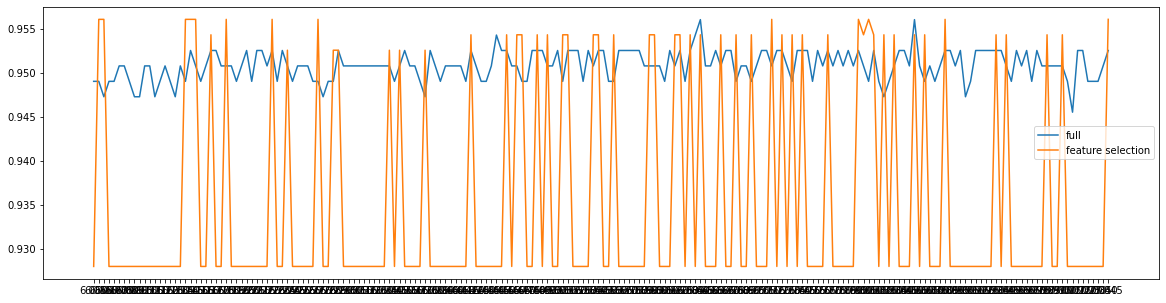

In [42]:
plt.figure(figsize=(20, 5))
plt.plot(C, fullx, label="full")
plt.plot(C, fsx, label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

In [43]:
print(max(fsx), C[fsx.index(max(fsx))])

0.9561090225563911 6.055


In [46]:
# 验证模型效果：降维之前
LR_ = LR(solver="liblinear", C=6.055, random_state=420)
cross_val_score(LR_, data.data, data.target, cv=10).mean()

0.9490601503759398

In [47]:
# 验证模型效果：降维之后
# 降维后，特征大幅减少，准确率还高了
LR_ = LR(solver="liblinear", C=6.055, random_state=420)
x_embedded = SelectFromModel(LR_, norm_order=1).fit_transform(data.data, data.target)
cross_val_score(LR_, x_embedded, data.target, cv=10).mean()

0.9561090225563911

In [48]:
x_embedded.shape

(569, 9)

In [54]:
# multinomial 和 ovr 的区别

from sklearn.datasets import load_iris
iris = load_iris()

In [58]:
for multi_class in ("multinomial", "ovr"):
    clf = LR(solver="sag", max_iter=1000, random_state=42, 
                             multi_class=multi_class).fit(iris.data, iris.target)
    print("training score: {} ({})".format(clf.score(iris.data, iris.target), multi_class))

training score: 0.98 (multinomial)
training score: 0.9533333333333334 (ovr)


/home/ppp/anaconda3/envs/python-3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ppp/anaconda3/envs/python-3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


IndentationError: unexpected indent (<ipython-input-52-8e816617c2d0>, line 2)